In [98]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


In [49]:
# Test for one planet

# Define the API URL
api_url = 'https://swapi.dev/api/planets/1/'

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    planet_data = response.json()

    # Display information about the planet
    print("Planet Name:", planet_data['name'])
    print("Climate:", planet_data['climate'])
    print("Diameter:", planet_data['diameter'])
    print("Gravity:", planet_data['gravity'])
    print("Orbital Period:", planet_data['orbital_period'])
    print("Population:", planet_data['population'])
    print("Residents:", planet_data['residents'])
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Planet Name: Tatooine
Climate: arid
Diameter: 10465
Gravity: 1 standard
Orbital Period: 304
Population: 200000
Residents: ['https://swapi.dev/api/people/1/', 'https://swapi.dev/api/people/2/', 'https://swapi.dev/api/people/4/', 'https://swapi.dev/api/people/6/', 'https://swapi.dev/api/people/7/', 'https://swapi.dev/api/people/8/', 'https://swapi.dev/api/people/9/', 'https://swapi.dev/api/people/11/', 'https://swapi.dev/api/people/43/', 'https://swapi.dev/api/people/62/']


In [50]:
# Define the base API URL for planets
base_url = 'https://swapi.dev/api/planets/'

# Function to get data from a specific endpoint
def get_data(api_url):
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

In [51]:
all_planets_data = []

# Loop through planets
for planet_id in range(1,28):  # Adjust the range as needed
    planet_url = f'{base_url}{planet_id}/'
    planet_data = get_data(planet_url)
    
    if planet_data:
        all_planets_data.append(planet_data)

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

# Convert diameter to numeric (it's currently a string with commas)
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'].str.replace(',', ''), errors='coerce')



In [82]:
# Define the base API URL for planets
base_url = 'https://swapi.dev/api/planets/'

# Function to get data from a specific endpoint
def get_data(api_url):
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

# Initialize an empty list to store planet data
all_planets_data = []

# Loop through planets
for planet_id in range(1, 25):  # Adjust the range as needed
    planet_url = f'{base_url}{planet_id}/'
    planet_data = get_data(planet_url)
    
    if planet_data:
        all_planets_data.append(planet_data)

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

# Convert diameter to numeric (it's currently a string with commas)
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'].str.replace(',', ''), errors='coerce')

# Convert diameter and population to numeric (they are currently strings with commas)
planets_df['population'] = pd.to_numeric(planets_df['population'].str.replace(',', ''), errors='coerce')

# Filter out planets with a diameter of 0
planets_df = planets_df[planets_df['diameter'] != 0]

# Reset the index to ensure correct alignment with y-axis ticks
planets_df.reset_index(drop=True, inplace=True)


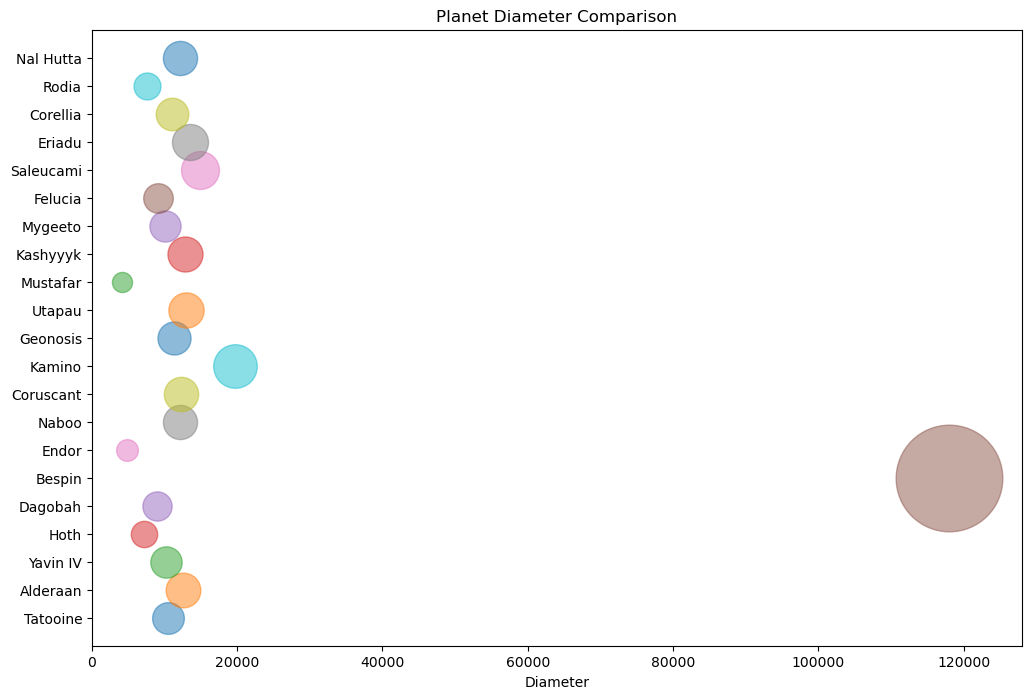

In [83]:
# Plot circles for each planet based on diameter
plt.figure(figsize=(12, 8))
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=planet['diameter'],
        y=index,
        s=planet['diameter'] / 20,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

plt.title('Planet Diameter Comparison')
plt.xlabel('Diameter')
plt.yticks(range(len(planets_df)), planets_df['name'])
plt.xlim(0, planets_df['diameter'].max() + 10000)  # Set the x-axis limit dynamically
plt.show()

Basic Statistics for Diameter:
count        21.000000
mean      15989.380952
std       23618.463675
min        4200.000000
25%        9100.000000
50%       11370.000000
75%       12765.000000
max      118000.000000
Name: diameter, dtype: float64


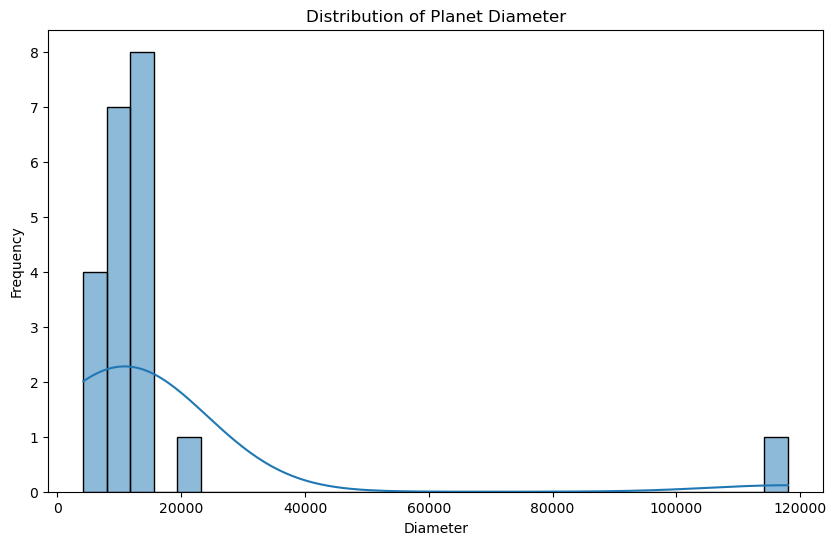

In [86]:
# Basic EDA for diameter
print("Basic Statistics for Diameter:")
print(planets_df['diameter'].describe())

# Visualize the distribution of diameter
plt.figure(figsize=(10, 6))
sns.histplot(planets_df['diameter'].dropna(), bins=30, kde=True)
plt.title('Distribution of Planet Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()

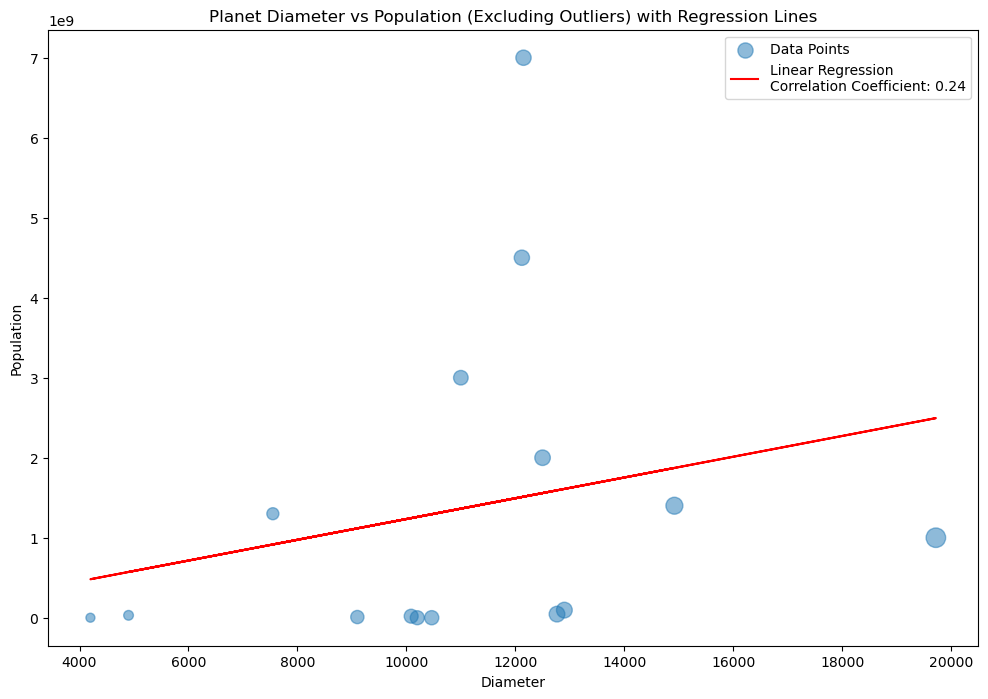

In [100]:
# Exclude outliers (arbitrarily chosen threshold values)
diameter_threshold = 20000
population_threshold = 10000000000
filtered_planets_df = planets_df[(planets_df['diameter'] < diameter_threshold) & (planets_df['population'] < population_threshold)]

# Fit a linear regression line
linear_fit = np.polyfit(filtered_planets_df['diameter'], filtered_planets_df['population'], 1)
linear_line = np.polyval(linear_fit, filtered_planets_df['diameter'])

# Plot scatter plot for diameter vs population (excluding outliers)
plt.figure(figsize=(12, 8))
plt.scatter(filtered_planets_df['diameter'], filtered_planets_df['population'], s=filtered_planets_df['diameter'] / 100, alpha=0.5, label='Data Points')
plt.plot(filtered_planets_df['diameter'], linear_line, color='red', label=f'Linear Regression\nCorrelation Coefficient: {correlation_coef:.2f}')

# Calculate the correlation coefficient
correlation_coef = pearsonr(filtered_planets_df['diameter'], filtered_planets_df['population'])[0]

# Add labels and title
plt.title('Planet Diameter vs Population (Excluding Outliers) with Regression Lines')
plt.xlabel('Diameter')
plt.ylabel('Population')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [58]:
# Drop all columns that are not needed
planets_df.drop(columns= ['residents', 'films', 'created', 'edited','url'], inplace=True)

In [59]:
planets_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000
